In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Strassen algorithm VS standard matrix multiplication

In [141]:
df = pd.read_csv('./result1.csv')
df['n_3'] = df['matrix dimension']**3 / 2e5
df['n_log'] = df['matrix dimension']**(np.log2(7)) / 1e5

In [142]:
df2 = pd.read_csv('./result2.csv')
df['Strassen1'] = df2['Strassen']
df

,matrix dimension,Strassen,Standard,n_3,n_log,Strassen1
0,0,0,0,0.000,0.000000,0
1,0,0,0,0.000,0.000000,0
2,0,0,0,0.000,0.000000,0
3,0,0,0,0.000,0.000000,0
4,0,0,0,0.000,0.000000,0
...,...,...,...,...,...,...
495,990,2835,6480,4851.495,2569.278651,916
496,990,2732,6577,4851.495,2569.278651,1022
497,990,2742,6563,4851.495,2569.278651,941
498,990,2727,6406,4851.495,2569.278651,968


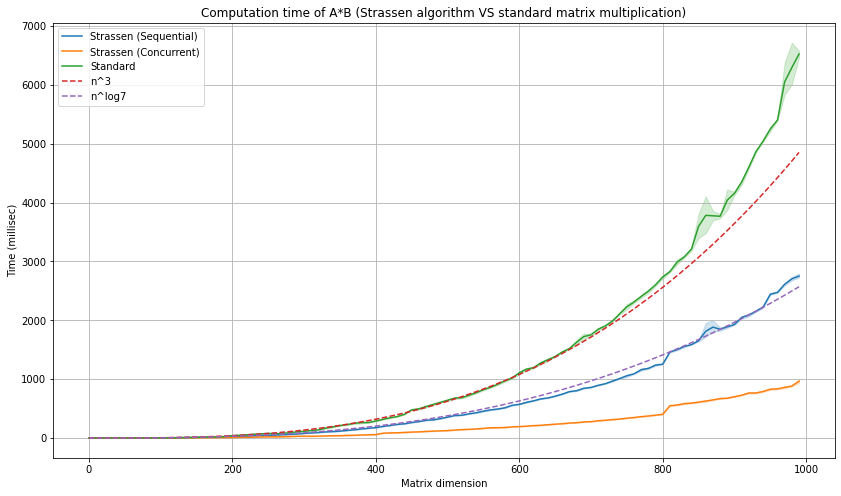

In [143]:
ax = plt.figure(figsize=(14,8))

sns.lineplot(x="matrix dimension", y="Strassen", data=df, label="Strassen (Sequential)")
sns.lineplot(x="matrix dimension", y="Strassen1", data=df, label="Strassen (Concurrent)")
sns.lineplot(x="matrix dimension", y="Standard", data=df, label="Standard")

plt.plot(df["matrix dimension"], df["n_3"], label="n^3", linestyle='--')
plt.plot(df["matrix dimension"], df["n_log"], label="n^log7", linestyle='--')

plt.legend()
plt.title("Computation time of A*B (Strassen algorithm VS standard matrix multiplication)")
plt.xlabel("Matrix dimension")
plt.ylabel("Time (millisec)")
plt.grid()
plt.show()

# 2. BLAS3-A test

In [137]:
df = pd.read_csv('./result3.csv')
df['n_3'] = df['matrix dimension']**3 / 2e5
df['n_log'] = df['matrix dimension']**(np.log2(7)) / 1e5

In [138]:
df2 = pd.read_csv('./result2.csv')
df['Strassen1'] = df2['Strassen']
df

,matrix dimension,Strassen,Standard,n_3,n_log,Strassen1
0,0,0,0,0.00,0.000000,0
1,0,0,0,0.00,0.000000,0
2,0,0,0,0.00,0.000000,0
3,0,0,0,0.00,0.000000,0
4,0,0,0,0.00,0.000000,0
...,...,...,...,...,...,...
490,980,2652,8636,4705.96,2497.084544,878
491,980,2687,6245,4705.96,2497.084544,890
492,980,2713,6414,4705.96,2497.084544,901
493,980,2668,6433,4705.96,2497.084544,873


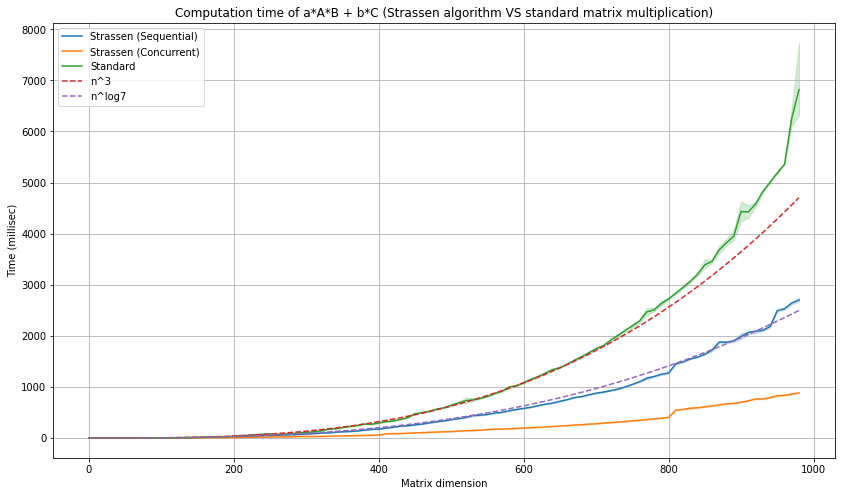

In [139]:
ax = plt.figure(figsize=(14,8))
sns.lineplot(x="matrix dimension", y="Strassen", data=df, label="Strassen (Sequential)")
sns.lineplot(x="matrix dimension", y="Strassen1", data=df, label="Strassen (Concurrent)")
sns.lineplot(x="matrix dimension", y="Standard", data=df, label="Standard")

plt.plot(df["matrix dimension"], df["n_3"], label="n^3", linestyle='--')
plt.plot(df["matrix dimension"], df["n_log"], label="n^log7", linestyle='--')

plt.legend()
plt.title("Computation time of a*A*B + b*C (Strassen algorithm VS standard matrix multiplication)")
plt.xlabel("Matrix dimension")
plt.ylabel("Time (millisec)")
plt.grid()
plt.show()

## Compare theoretical asymptotic bound with coefficients

In [154]:
x = np.linspace(0,80,81)
y1 = 4.7*x**(2.8)
y2 = 2*x**(3)

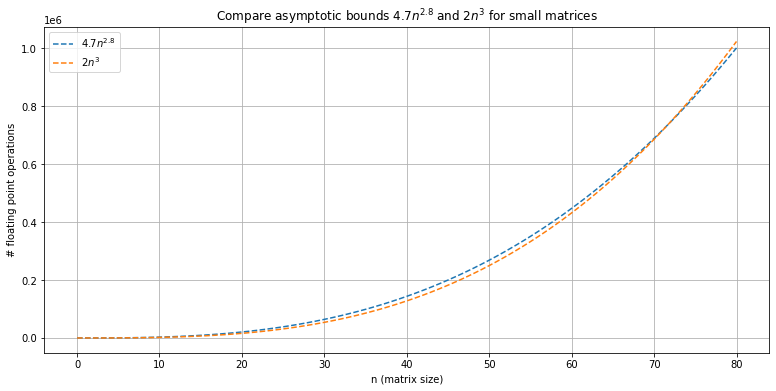

In [169]:
ax = plt.figure(figsize=(13,6))
plt.plot(y1, linestyle='--', label='$4.7n^{2.8}$')
plt.plot(y2, linestyle='--', label='$2n^{3}$')
plt.legend()
plt.title("Compare asymptotic bounds $4.7n^{2.8}$ and $2n^{3}$ for small matrices")
plt.xlabel("n (matrix size)")
plt.ylabel("# floating point operations")
plt.grid()
plt.show()